In [16]:
import os
import glob

In [17]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [4]:
img_names = glob.glob("C:/Users/e.lavrova/Desktop/vessels_small/p/*.bmp")

dims = []
for img_name in img_names:
    img = cv2.imread(img_name)
    dims.append(img.shape[0])
    dims.append(img.shape[1])
    
np.min(dims), np.max(dims), np.mean(dims), np.median(dims)

plt.hist(dims)

In [18]:
vessel_cascade = cv2.CascadeClassifier("C:/Users/e.lavrova/Desktop/vessels_small/classifier/cascade.xml")

In [19]:
img = cv2.imread("C:/Users/e.lavrova/Desktop/parisk_test/IMG-0001-00015.bmp")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [20]:
vessels = vessel_cascade.detectMultiScale3(gray, 1.1, 3, outputRejectLevels=True)

In [21]:
for(x, y, w, h) in vessels[0]:
    img = cv2.rectangle(img, (x,y), (x+w,y+h), (0,0,255), 1)

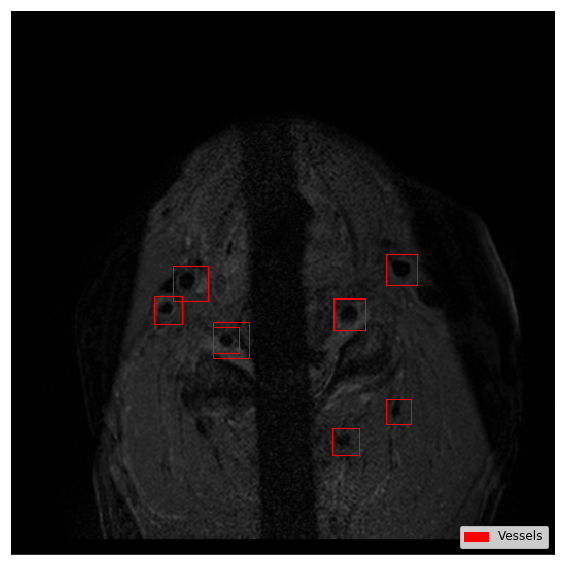

In [22]:
plt.figure(figsize = (10,10)) 

plt.xticks([])
plt.yticks([])

vessel_patch = mpatches.Patch(color='red', label='Vessels')
plt.legend(handles=[vessel_patch], loc='lower right', fontsize=12)

imgplot = plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [85]:
from nms import nms

In [95]:
vessel_rects = []

for vessel in vessels[0]:
    vessel_rects.append((vessel[0], vessel[1], vessel[2], vessel[3]))

In [96]:
confs = []

for c in vessels[2]:
    confs.append(c[0])

In [98]:
idxs = nms.boxes(vessel_rects, confs)

In [99]:
img = cv2.imread("C:/Users/e.lavrova/Desktop/parisk_test/IMG-0001-00015.bmp")

In [100]:
for idx in idxs:
    x = vessels[0][idx][0]
    y = vessels[0][idx][1]
    w = vessels[0][idx][2]
    h = vessels[0][idx][3]
    img = cv2.rectangle(img, (x,y), (x+w,y+h), (0,0,255), 1)

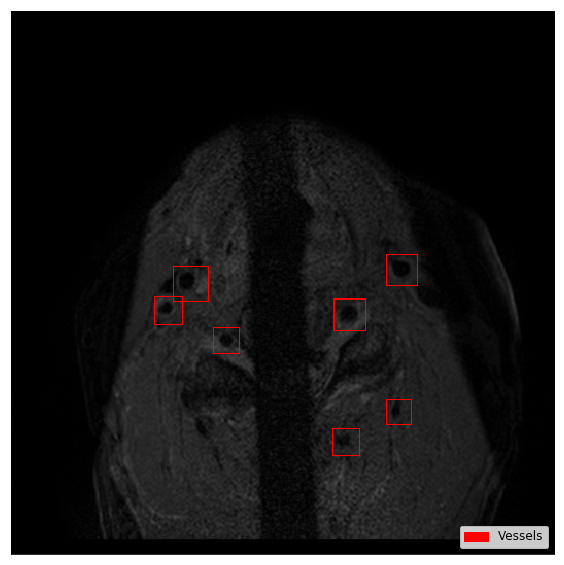

In [101]:
plt.figure(figsize = (10,10)) 

plt.xticks([])
plt.yticks([])

vessel_patch = mpatches.Patch(color='red', label='Vessels')
plt.legend(handles=[vessel_patch], loc='lower right', fontsize=12)

imgplot = plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))